In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset,DataLoader

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\week_of_data4_headFlaw.csv",encoding='utf-8',header=None)
df

,0,1,2,3
0,2015/5/20 0:00,263,240,2015/5/20
1,2015/5/20 0:05,263,234,2015/5/20
2,2015/5/20 0:10,263,228,2015/5/20
3,2015/5/20 0:15,263,227,2015/5/20
4,2015/5/20 0:20,263,228,2015/5/20
...,...,...,...,...
199579,2015/5/27 23:38,281,237,2015/5/27
199580,2015/5/27 23:43,281,238,2015/5/27
199581,2015/5/27 23:48,281,240,2015/5/27
199582,2015/5/27 23:53,281,241,2015/5/27


In [3]:
df.columns = ['time','id','gl', 'date']
df = df[['time','id','gl']]

In [4]:
df.head()

,time,id,gl
0,2015/5/20 0:00,263,240
1,2015/5/20 0:05,263,234
2,2015/5/20 0:10,263,228
3,2015/5/20 0:15,263,227
4,2015/5/20 0:20,263,228


In [5]:
ID = df['id'].value_counts().index
pd.set_option('display.max_rows',100)
print(ID)
print(len(ID))

Index([263, 106, 185, 218,  74,  53, 216, 219, 113,  47,  14, 134,  37,  61,
        46,  33,  54, 278, 136, 274,   9, 265, 283, 273, 119, 129,  32,  27,
       236,  26, 206,  18, 165,  31,  24, 267,  22, 247, 124,  79, 258,  58,
       234, 175, 156, 158, 188, 189, 201, 203,  77, 127,  67,  70, 102, 137,
         7,  95, 232,  23, 271, 130,  68, 227, 228, 164, 111, 251, 155, 245,
       229, 277, 193, 101, 269,   3, 250, 116, 109,  81,  65, 184, 146, 105,
       138,  76, 198, 139, 214, 166, 135, 123, 253, 187,  17, 205, 220, 243,
       281],
      dtype='int64', name='id')
99


In [6]:
#获取数据

# 创建空的DataFrame
total_data = {'id': [],'month':[],'day':[],'hour':[],'minute':[],'weekday':[],'gl': []}
total_data = pd.DataFrame(total_data)

for i in ID:
    print("开始获取id为{}的被试数据：---------------------------------".format(i))
    data = df[df['id']== i].copy() 
    print(data.shape)
    #将time列设成date数据类型
    data['time'] = pd.to_datetime(data['time'])

    #按照时间排序
    data = data.sort_values(by='time') 

    #提取月为单独的一列
    data['month'] = data['time'].dt.month

    #提取日为单独的一列
    data['day'] = data['time'].dt.day

    #提取小时为单独的一列
    data['hour'] = data['time'].dt.hour

    #提取分钟为单独的一列
    data['minute'] = data['time'].dt.minute

    # 提取周几（0表示星期一，1表示星期二，依此类推）
    data['weekday'] = data['time'].dt.dayofweek

    data = data.set_index('time')

#     data['target'] = data['gl'].shift(-1)

    #使用了shift函数，在最后必然是有缺失值的，这里去掉缺失值所在行
    data = data.dropna()     

    data = data.astype(np.float32) # 修改数据类型
    
    #整合全部数据
    total_data = pd.concat([total_data, data], ignore_index=True)

开始获取id为263的被试数据：---------------------------------
(2016, 3)
开始获取id为106的被试数据：---------------------------------
(2016, 3)
开始获取id为185的被试数据：---------------------------------
(2016, 3)
开始获取id为218的被试数据：---------------------------------
(2016, 3)
开始获取id为74的被试数据：---------------------------------
(2016, 3)
开始获取id为53的被试数据：---------------------------------
(2016, 3)
开始获取id为216的被试数据：---------------------------------
(2016, 3)
开始获取id为219的被试数据：---------------------------------
(2016, 3)
开始获取id为113的被试数据：---------------------------------
(2016, 3)
开始获取id为47的被试数据：---------------------------------
(2016, 3)
开始获取id为14的被试数据：---------------------------------
(2016, 3)
开始获取id为134的被试数据：---------------------------------
(2016, 3)
开始获取id为37的被试数据：---------------------------------
(2016, 3)
开始获取id为61的被试数据：---------------------------------
(2016, 3)
开始获取id为46的被试数据：---------------------------------
(2016, 3)
开始获取id为33的被试数据：---------------------------------
(2016, 3)
开始获取id为54的被试数据：---------------------------------

In [7]:
total_data.head(10)

,id,month,day,hour,minute,weekday,gl
0,263.0,5.0,20.0,0.0,0.0,2.0,240.0
1,263.0,5.0,20.0,0.0,5.0,2.0,234.0
2,263.0,5.0,20.0,0.0,10.0,2.0,228.0
3,263.0,5.0,20.0,0.0,15.0,2.0,227.0
4,263.0,5.0,20.0,0.0,20.0,2.0,228.0
5,263.0,5.0,20.0,0.0,25.0,2.0,226.0
6,263.0,5.0,20.0,0.0,30.0,2.0,224.0
7,263.0,5.0,20.0,0.0,35.0,2.0,219.0
8,263.0,5.0,20.0,0.0,40.0,2.0,213.0
9,263.0,5.0,20.0,0.0,45.0,2.0,205.0


In [8]:
ID1 = total_data['id'].value_counts().index    #value_conuts() 返回一个series

print(len(ID1))

pd.set_option('display.max_rows',100)

99


In [60]:
#窗口划分
# 创建一个空的三维数组

train_total_feats = np.empty((0, 24, 7))
train_total_targets = np.empty((0,7))

test_total_feats = np.empty((0, 199, 24, 7))
test_total_targets = np.empty((0, 199, 7))

validation_total_feats = np.empty((0, 24, 7))
validation_total_targets = np.empty((0, 7))

# 设每条数据序列有24组数据
seq = 24
for i in ID1:
    data = total_data[total_data['id'] == i]
    print("当前被试(id == {})的数据集长度：".format(i),data.shape)
    
    # 创建两个列表，用来存储当前被试的数据特征和标签
    one_feats = np.empty((0, 24, 7))
    one_targets = np.empty((0,7))
    for index in range(len(data) - seq):
        # 构建特征集
        one_feats = np.concatenate((one_feats, data[index: index + seq].values.reshape(-1,24,7)), axis=0)
        # 构建target集
        one_targets = np.concatenate((one_targets, data.iloc[index + seq].values.reshape(1,-1)), axis=0)
    
    #划分每个被试的训练集和测试集
    test_size = int(0.1 * one_feats.shape[0])  # np.round(1)是四舍五入，
    
    validation_size = int(0.1 * one_feats.shape[0])
    
    train_size = one_feats.shape[0] - test_size - validation_size
    
    train_total_feats = np.concatenate((train_total_feats, one_feats[:train_size, :, :]), axis=0)
    train_total_targets = np.concatenate((train_total_targets, one_targets[:train_size,:]), axis=0)

    validation_total_feats = np.concatenate((validation_total_feats, one_feats[train_size:validation_size+train_size, :, :]), axis=0)
    validation_total_targets = np.concatenate((validation_total_targets, one_targets[train_size:validation_size+train_size, :]), axis=0)
    
    test_total_feats= np.concatenate((test_total_feats, one_feats[-test_size:, :, :].reshape(1, -1, 24, 7)), axis=0)
    test_total_targets = np.concatenate((test_total_targets, one_targets[-test_size:, :].reshape(1, -1, 7)), axis=0)

当前被试(id == 263.0)的数据集长度： (2016, 7)
当前被试(id == 269.0)的数据集长度： (2016, 7)
当前被试(id == 193.0)的数据集长度： (2016, 7)
当前被试(id == 277.0)的数据集长度： (2016, 7)
当前被试(id == 229.0)的数据集长度： (2016, 7)
当前被试(id == 245.0)的数据集长度： (2016, 7)
当前被试(id == 155.0)的数据集长度： (2016, 7)
当前被试(id == 251.0)的数据集长度： (2016, 7)
当前被试(id == 111.0)的数据集长度： (2016, 7)
当前被试(id == 164.0)的数据集长度： (2016, 7)
当前被试(id == 228.0)的数据集长度： (2016, 7)
当前被试(id == 227.0)的数据集长度： (2016, 7)
当前被试(id == 68.0)的数据集长度： (2016, 7)
当前被试(id == 130.0)的数据集长度： (2016, 7)
当前被试(id == 271.0)的数据集长度： (2016, 7)
当前被试(id == 23.0)的数据集长度： (2016, 7)
当前被试(id == 232.0)的数据集长度： (2016, 7)
当前被试(id == 95.0)的数据集长度： (2016, 7)
当前被试(id == 7.0)的数据集长度： (2016, 7)
当前被试(id == 137.0)的数据集长度： (2016, 7)
当前被试(id == 102.0)的数据集长度： (2016, 7)
当前被试(id == 70.0)的数据集长度： (2016, 7)
当前被试(id == 67.0)的数据集长度： (2016, 7)
当前被试(id == 101.0)的数据集长度： (2016, 7)
当前被试(id == 3.0)的数据集长度： (2016, 7)
当前被试(id == 77.0)的数据集长度： (2016, 7)
当前被试(id == 250.0)的数据集长度： (2016, 7)
当前被试(id == 243.0)的数据集长度： (2016, 7)
当前被试(id == 220.0)的数据集长度： (2016

In [61]:
# 将变量保存到文件，以便下次直接读取，不用在处理数据
np.save('./variable_file/train_total_feats.npy',train_total_feats)
np.save('./variable_file/train_total_targets.npy',train_total_targets)

np.save('./variable_file/validation_total_feats.npy',validation_total_feats)
np.save('./variable_file/validation_total_targets.npy',validation_total_targets)

np.save('./variable_file/test_total_feats.npy',test_total_feats)
np.save('./variable_file/test_total_targets.npy',test_total_targets)

In [62]:
# 加载变量的代码：
# train_total_feats = np.load('./variable_file/train_total_feats.npy')
train_total_feats = np.load('./variable_file/train_total_feats.npy')
train_total_targets = np.load('./variable_file/train_total_targets.npy')

validation_total_feats = np.load('./variable_file/validation_total_feats.npy')
validation_total_targets = np.load('./variable_file/validation_total_targets.npy')

test_total_feats = np.load('./variable_file/test_total_feats.npy')
test_total_targets = np.load('./variable_file/test_total_targets.npy')

print("训练数据窗口总数：", train_total_feats.shape)
print("训练数据标签总数：", train_total_targets.shape)

print("验证数据窗口总数", validation_total_feats.shape)
print("验证数据标签总数", validation_total_targets.shape)

print("测试数据窗口数：", test_total_feats.shape)
print("测试数据标签数：", test_total_targets.shape)

训练数据窗口总数： (157806, 24, 7)
训练数据标签总数： (157806, 7)
验证数据窗口总数 (19701, 24, 7)
验证数据标签总数 (19701, 7)
测试数据窗口数： (99, 199, 24, 7)
测试数据标签数： (99, 199, 7)


In [63]:
#数据归一化操作(先将四个变量的shape变成（-1,7）)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))  
scaler_train_total_feats = scaler.fit_transform(train_total_feats.reshape(-1,7))
scaler_train_total_targets = scaler.transform(train_total_targets)

scaler_validation_total_feats = scaler.transform(validation_total_feats.reshape(-1,7))
scaler_validation_total_targets = scaler.transform(validation_total_targets)

scaler_test_total_feats = scaler.transform(test_total_feats.reshape(-1,7))
scaler_test_total_targets = scaler.transform(test_total_targets.reshape(-1,7))

In [ ]:
# 测试返归一化后数据的否和原先的一样
source_test_total_feats = scaler.inverse_transform(scaler_test_total_feats)
source_test_total_feats = source_test_total_feats.reshape(99, -1, 24, 7)
print(np.allclose(source_test_total_feats, test_total_feats))

In [64]:
# 数据归一化之后将四个变量的shape变回来
scaler_train_total_feats = scaler_train_total_feats.reshape(-1,24,7)

scaler_validation_total_feats = scaler_validation_total_feats.reshape(-1,24,7)

scaler_test_total_feats = scaler_test_total_feats.reshape(99,-1,24,7)
scaler_test_total_targets = scaler_test_total_targets.reshape(99,-1,7)

In [65]:
device =  torch.device("cuda:0")
trainX = torch.from_numpy(scaler_train_total_feats).type(torch.Tensor).to(device)
trainY = torch.from_numpy(scaler_train_total_targets).type(torch.Tensor).to(device)

validationX = torch.from_numpy(scaler_validation_total_feats).type(torch.Tensor).to(device)
validationY = torch.from_numpy(scaler_validation_total_targets).type(torch.Tensor).to(device)

testX = torch.from_numpy(scaler_test_total_feats).type(torch.Tensor)
testY = torch.from_numpy(scaler_test_total_targets).type(torch.Tensor)

In [67]:
print('x_train.shape = ', trainX.shape)
print('y_train.shape = ', trainY.shape)
print('x_validation.shape = ', validationX.shape)
print('y_validation.shape = ', validationY.shape)

print('testX.shape=', testX.shape)
print("testY.shape=", testY.shape)

x_train.shape =  torch.Size([157806, 24, 7])
y_train.shape =  torch.Size([157806, 7])
x_validation.shape =  torch.Size([19701, 24, 7])
y_validation.shape =  torch.Size([19701, 7])
testX.shape= torch.Size([99, 199, 24, 7])
testY.shape= torch.Size([99, 199, 7])


In [68]:
batch_size= 2048
train = TensorDataset(trainX,trainY)

validation = TensorDataset(validationX,validationY)

train_loader = DataLoader(dataset=train, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(dataset=validation, batch_size=batch_size, shuffle=True)

In [69]:
import torch.nn as nn

input_dim = 7      # 数据的特征数
hidden_dim = 64   # 隐藏层的神经元个数
num_layers = 4     # LSTM的层数
output_dim = 7     # 预测值的特征数

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        
        self.hidden_dim = hidden_dim

        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_dim, output_dim) 

    def forward(self, x):
        # Initialize hidden state with zeros   
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).cuda()
        # 这里x.size(0)就是batch_size

        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).cuda()

        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
#         print(out.shape)
        out = self.fc(out[:,-1,:]) 
#         print(out.shape)
        return out

In [70]:
# 实例化模型
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
model = model.to(device)

# 定义优化器和损失函数
optimiser = torch.optim.Adam(model.parameters(), lr=0.0001) # 使用Adam优化算法
loss_fn = torch.nn.MSELoss(reduction='mean')             # 使用均方差作为损失函数
loss_fn = loss_fn.to(device)

# 设定数据遍历次数
num_epochs = 300

# 打印模型结构
print(model)

LSTM(
  (lstm): LSTM(7, 64, num_layers=4, batch_first=True)
  (fc): Linear(in_features=64, out_features=7, bias=True)
)


In [71]:
# train model

# 记录训练次数
total_train_step = 0
# 记录测试次数
total_test_step = 0    

for t in range(num_epochs):
    print("--------------------第{}轮训练开始----------------------".format(t+1))
    model.train()
    for data in train_loader:
        feats, tars = data
        feats = feats
        tars = tars
        
        y_train_pred = model(feats)
        
        loss = loss_fn(y_train_pred, tars)
        
        # Zero out gradient, else they will accumulate between epochs 将梯度归零
        optimiser.zero_grad()

        # Backward pass
        loss.backward()

        # Update parameters
        optimiser.step()

        total_train_step += 1
        
        if total_train_step % 20 == 0:
            print("训练次数：{}, Loss: {}".format(total_train_step,loss.item()))
    
    #验证步骤开始
    total_test_loss = 0
    total_accuracy = 0
    model.eval()
    with torch.no_grad():
        print("**********开始本轮测试**********".format(t+1))
        for data in test_loader:
            feats,tars = data
            feats = feats
            tars = tars

            y_train_pred = model(feats)
            
            loss = loss_fn(y_train_pred,tars)
            
            total_test_loss += loss.item()
            
    print("第 {} 轮训练在验证集上的Loss: {}".format(t+1,total_test_loss))

    total_test_step += 1

    #保存每一轮训练的模型
    torch.save(model.state_dict(), "./saved_model/allen_{}.pth".format(t))
    print("allen_{}.pth 模型已保存".format(t))

--------------------第1轮训练开始----------------------
训练次数：20, Loss: 0.3721657991409302
训练次数：40, Loss: 0.35986578464508057
训练次数：60, Loss: 0.333344966173172
**********开始本轮测试**********
第 1 轮训练在验证集上的Loss: 3.0271052718162537
allen_0.pth 模型已保存
--------------------第2轮训练开始----------------------
训练次数：80, Loss: 0.30658021569252014
训练次数：100, Loss: 0.2915503978729248
训练次数：120, Loss: 0.28189951181411743
训练次数：140, Loss: 0.2691996991634369
**********开始本轮测试**********
第 2 轮训练在验证集上的Loss: 2.6026353240013123
allen_1.pth 模型已保存
--------------------第3轮训练开始----------------------
训练次数：160, Loss: 0.2598712742328644
训练次数：180, Loss: 0.24584168195724487
训练次数：200, Loss: 0.19149859249591827
训练次数：220, Loss: 0.1309850960969925
**********开始本轮测试**********
第 3 轮训练在验证集上的Loss: 1.2700747475028038
allen_2.pth 模型已保存
--------------------第4轮训练开始----------------------
训练次数：240, Loss: 0.10911627113819122
训练次数：260, Loss: 0.10178769379854202
训练次数：280, Loss: 0.09769714623689651
训练次数：300, Loss: 0.09402206540107727
**********开始本轮测试******

训练次数：2300, Loss: 0.004672981332987547
训练次数：2320, Loss: 0.005759337451308966
训练次数：2340, Loss: 0.008795881643891335
**********开始本轮测试**********
第 30 轮训练在验证集上的Loss: 0.048310442827641964
allen_29.pth 模型已保存
--------------------第31轮训练开始----------------------
训练次数：2360, Loss: 0.006241112016141415
训练次数：2380, Loss: 0.004479219671338797
训练次数：2400, Loss: 0.005271297879517078
**********开始本轮测试**********
第 31 轮训练在验证集上的Loss: 0.04482662584632635
allen_30.pth 模型已保存
--------------------第32轮训练开始----------------------
训练次数：2420, Loss: 0.005214686039835215
训练次数：2440, Loss: 0.004167627543210983
训练次数：2460, Loss: 0.00381189351901412
训练次数：2480, Loss: 0.004415073432028294
**********开始本轮测试**********
第 32 轮训练在验证集上的Loss: 0.048026091419160366
allen_31.pth 模型已保存
--------------------第33轮训练开始----------------------
训练次数：2500, Loss: 0.005448454525321722
训练次数：2520, Loss: 0.0036878460086882114
训练次数：2540, Loss: 0.0036496578250080347
训练次数：2560, Loss: 0.004758121911436319
**********开始本轮测试**********
第 33 轮训练在验证集上的Loss: 0.04436

训练次数：4540, Loss: 0.00331576238386333
训练次数：4560, Loss: 0.0032914490438997746
训练次数：4580, Loss: 0.002571316435933113
训练次数：4600, Loss: 0.003280299948528409
**********开始本轮测试**********
第 59 轮训练在验证集上的Loss: 0.029638827545568347
allen_58.pth 模型已保存
--------------------第60轮训练开始----------------------
训练次数：4620, Loss: 0.003041160060092807
训练次数：4640, Loss: 0.002095976611599326
训练次数：4660, Loss: 0.0027765275444835424
训练次数：4680, Loss: 0.0020007246639579535
**********开始本轮测试**********
第 60 轮训练在验证集上的Loss: 0.025773368775844574
allen_59.pth 模型已保存
--------------------第61轮训练开始----------------------
训练次数：4700, Loss: 0.0024384211283177137
训练次数：4720, Loss: 0.002289163414388895
训练次数：4740, Loss: 0.002195524051785469
**********开始本轮测试**********
第 61 轮训练在验证集上的Loss: 0.02727391617372632
allen_60.pth 模型已保存
--------------------第62轮训练开始----------------------
训练次数：4760, Loss: 0.0026426149997860193
训练次数：4780, Loss: 0.0024543756153434515
训练次数：4800, Loss: 0.0022323427256196737
训练次数：4820, Loss: 0.0028587107080966234
**********

第 87 轮训练在验证集上的Loss: 0.018966609961353242
allen_86.pth 模型已保存
--------------------第88轮训练开始----------------------
训练次数：6800, Loss: 0.0016990283038467169
训练次数：6820, Loss: 0.0016958493506535888
训练次数：6840, Loss: 0.0014462636318057775
训练次数：6860, Loss: 0.0020517499651759863
**********开始本轮测试**********
第 88 轮训练在验证集上的Loss: 0.019655868760310113
allen_87.pth 模型已保存
--------------------第89轮训练开始----------------------
训练次数：6880, Loss: 0.002584398491308093
训练次数：6900, Loss: 0.002263735979795456
训练次数：6920, Loss: 0.002171826083213091
训练次数：6940, Loss: 0.0018944788025692105
**********开始本轮测试**********
第 89 轮训练在验证集上的Loss: 0.01939328562002629
allen_88.pth 模型已保存
--------------------第90轮训练开始----------------------
训练次数：6960, Loss: 0.001293159555643797
训练次数：6980, Loss: 0.0016271255444735289
训练次数：7000, Loss: 0.002375028096139431
训练次数：7020, Loss: 0.0018930676160380244
**********开始本轮测试**********
第 90 轮训练在验证集上的Loss: 0.019154241774231195
allen_89.pth 模型已保存
--------------------第91轮训练开始----------------------
训练次数：7040, Lo

训练次数：8980, Loss: 0.002225502859801054
训练次数：9000, Loss: 0.0011315122246742249
训练次数：9020, Loss: 0.002100753365084529
训练次数：9040, Loss: 0.002012095646932721
**********开始本轮测试**********
第 116 轮训练在验证集上的Loss: 0.014943159418180585
allen_115.pth 模型已保存
--------------------第117轮训练开始----------------------
训练次数：9060, Loss: 0.0015830907505005598
训练次数：9080, Loss: 0.0015521334717050195
训练次数：9100, Loss: 0.0012599462643265724
训练次数：9120, Loss: 0.0010950819123536348
**********开始本轮测试**********
第 117 轮训练在验证集上的Loss: 0.0154379399609752
allen_116.pth 模型已保存
--------------------第118轮训练开始----------------------
训练次数：9140, Loss: 0.0017536608502268791
训练次数：9160, Loss: 0.0010926446411758661
训练次数：9180, Loss: 0.0013152486644685268
训练次数：9200, Loss: 0.001262300880625844
**********开始本轮测试**********
第 118 轮训练在验证集上的Loss: 0.014790551853366196
allen_117.pth 模型已保存
--------------------第119轮训练开始----------------------
训练次数：9220, Loss: 0.0014813741436228156
训练次数：9240, Loss: 0.001314738648943603
训练次数：9260, Loss: 0.0013799375155940652

训练次数：11180, Loss: 0.0014365350361913443
训练次数：11200, Loss: 0.0011133839143440127
训练次数：11220, Loss: 0.0006376497913151979
**********开始本轮测试**********
第 144 轮训练在验证集上的Loss: 0.012500521319452673
allen_143.pth 模型已保存
--------------------第145轮训练开始----------------------
训练次数：11240, Loss: 0.0008650301024317741
训练次数：11260, Loss: 0.0019275519298389554
训练次数：11280, Loss: 0.000605742447078228
训练次数：11300, Loss: 0.0015341931721195579
**********开始本轮测试**********
第 145 轮训练在验证集上的Loss: 0.012583394651301205
allen_144.pth 模型已保存
--------------------第146轮训练开始----------------------
训练次数：11320, Loss: 0.0007993218605406582
训练次数：11340, Loss: 0.001447462011128664
训练次数：11360, Loss: 0.0011244927300140262
训练次数：11380, Loss: 0.0015564068453386426
**********开始本轮测试**********
第 146 轮训练在验证集上的Loss: 0.0161698394222185
allen_145.pth 模型已保存
--------------------第147轮训练开始----------------------
训练次数：11400, Loss: 0.0010312378872185946
训练次数：11420, Loss: 0.0014510097680613399
训练次数：11440, Loss: 0.0008588771452195942
训练次数：11460, Loss: 0.0

训练次数：13340, Loss: 0.0021962427999824286
训练次数：13360, Loss: 0.0013152672909200191
训练次数：13380, Loss: 0.0009712910978123546
训练次数：13400, Loss: 0.0022481465712189674
**********开始本轮测试**********
第 172 轮训练在验证集上的Loss: 0.011233730358071625
allen_171.pth 模型已保存
--------------------第173轮训练开始----------------------
训练次数：13420, Loss: 0.0011620169971138239
训练次数：13440, Loss: 0.0006920485175214708
训练次数：13460, Loss: 0.0007664005388505757
训练次数：13480, Loss: 0.0007012627902440727
**********开始本轮测试**********
第 173 轮训练在验证集上的Loss: 0.010592556442134082
allen_172.pth 模型已保存
--------------------第174轮训练开始----------------------
训练次数：13500, Loss: 0.0005483989370986819
训练次数：13520, Loss: 0.0012375451624393463
训练次数：13540, Loss: 0.0011928626336157322
训练次数：13560, Loss: 0.0008766586543060839
**********开始本轮测试**********
第 174 轮训练在验证集上的Loss: 0.011133239779155701
allen_173.pth 模型已保存
--------------------第175轮训练开始----------------------
训练次数：13580, Loss: 0.0009954667184501886
训练次数：13600, Loss: 0.0015141391195356846
训练次数：13620, Loss:

第 199 轮训练在验证集上的Loss: 0.011034843046218157
allen_198.pth 模型已保存
--------------------第200轮训练开始----------------------
训练次数：15540, Loss: 0.0013333304086700082
训练次数：15560, Loss: 0.0009516954305581748
训练次数：15580, Loss: 0.0010036155581474304
训练次数：15600, Loss: 0.0003391504578758031
**********开始本轮测试**********
第 200 轮训练在验证集上的Loss: 0.01011879209545441
allen_199.pth 模型已保存
--------------------第201轮训练开始----------------------
训练次数：15620, Loss: 0.0008825778495520353
训练次数：15640, Loss: 0.0006632173317484558
训练次数：15660, Loss: 0.0012892362428829074
**********开始本轮测试**********
第 201 轮训练在验证集上的Loss: 0.01015718438429758
allen_200.pth 模型已保存
--------------------第202轮训练开始----------------------
训练次数：15680, Loss: 0.0011594254756346345
训练次数：15700, Loss: 0.0008599498542025685
训练次数：15720, Loss: 0.0008397615747526288
训练次数：15740, Loss: 0.0005173366516828537
**********开始本轮测试**********
第 202 轮训练在验证集上的Loss: 0.01018631921033375
allen_201.pth 模型已保存
--------------------第203轮训练开始----------------------
训练次数：15760, Loss: 0.000872

训练次数：17700, Loss: 0.0014436055207625031
**********开始本轮测试**********
第 227 轮训练在验证集上的Loss: 0.011004082334693521
allen_226.pth 模型已保存
--------------------第228轮训练开始----------------------
训练次数：17720, Loss: 0.0012939868029206991
训练次数：17740, Loss: 0.0005447397124953568
训练次数：17760, Loss: 0.00082232995191589
训练次数：17780, Loss: 0.0007515544421039522
**********开始本轮测试**********
第 228 轮训练在验证集上的Loss: 0.009490689262747765
allen_227.pth 模型已保存
--------------------第229轮训练开始----------------------
训练次数：17800, Loss: 0.0005788339185528457
训练次数：17820, Loss: 0.0007231998606584966
训练次数：17840, Loss: 0.0009145603398792446
训练次数：17860, Loss: 0.0017591739306226373
**********开始本轮测试**********
第 229 轮训练在验证集上的Loss: 0.009307320869993418
allen_228.pth 模型已保存
--------------------第230轮训练开始----------------------
训练次数：17880, Loss: 0.0006480573792941868
训练次数：17900, Loss: 0.000793304352555424
训练次数：17920, Loss: 0.0006841658032499254
训练次数：17940, Loss: 0.0002458368253428489
**********开始本轮测试**********
第 230 轮训练在验证集上的Loss: 0.0089501764

训练次数：19840, Loss: 0.0005615134141407907
训练次数：19860, Loss: 0.00031876270077191293
训练次数：19880, Loss: 0.0006198171759024262
**********开始本轮测试**********
第 255 轮训练在验证集上的Loss: 0.008364775276277214
allen_254.pth 模型已保存
--------------------第256轮训练开始----------------------
训练次数：19900, Loss: 0.0011133539956063032
训练次数：19920, Loss: 0.0006320362444967031
训练次数：19940, Loss: 0.0010917980689555407
训练次数：19960, Loss: 0.000861058768350631
**********开始本轮测试**********
第 256 轮训练在验证集上的Loss: 0.009439167362870649
allen_255.pth 模型已保存
--------------------第257轮训练开始----------------------
训练次数：19980, Loss: 0.0010357017163187265
训练次数：20000, Loss: 0.0008655923884361982
训练次数：20020, Loss: 0.0006904645124450326
训练次数：20040, Loss: 0.0005875129136256874
**********开始本轮测试**********
第 257 轮训练在验证集上的Loss: 0.009450779296457767
allen_256.pth 模型已保存
--------------------第258轮训练开始----------------------
训练次数：20060, Loss: 0.0006072750547900796
训练次数：20080, Loss: 0.0002653088595252484
训练次数：20100, Loss: 0.0008216547430492938
训练次数：20120, Loss:

训练次数：22020, Loss: 0.0003284053527750075
训练次数：22040, Loss: 0.0006087677902542055
训练次数：22060, Loss: 0.0004871169803664088
**********开始本轮测试**********
第 283 轮训练在验证集上的Loss: 0.00751632105675526
allen_282.pth 模型已保存
--------------------第284轮训练开始----------------------
训练次数：22080, Loss: 0.0002678466553334147
训练次数：22100, Loss: 0.0007240467239171267
训练次数：22120, Loss: 0.0004704893799498677
训练次数：22140, Loss: 0.0005599106079898775
**********开始本轮测试**********
第 284 轮训练在验证集上的Loss: 0.008151239948347211
allen_283.pth 模型已保存
--------------------第285轮训练开始----------------------
训练次数：22160, Loss: 0.000718648312613368
训练次数：22180, Loss: 0.0007615360082127154
训练次数：22200, Loss: 0.0007802595500834286
训练次数：22220, Loss: 0.00123008678201586
**********开始本轮测试**********
第 285 轮训练在验证集上的Loss: 0.017816490260884166
allen_284.pth 模型已保存
--------------------第286轮训练开始----------------------
训练次数：22240, Loss: 0.0008578915731050074
训练次数：22260, Loss: 0.0009175825980491936
训练次数：22280, Loss: 0.0007213730714283884
训练次数：22300, Loss: 0.0

In [73]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)  # 创建相同架构的模型
model.load_state_dict(torch.load(r"./saved_model/allen_241.pth"))
model = model.to(device)

In [74]:
#预测第一个被试的测试数据
y_test_pred = model(testX[0,:,:,:].to(device))
y_test_pred.shape

torch.Size([199, 7])

In [75]:
# 计算RMSE
mse_loss = loss_fn(y_test_pred, testY[0,:,:].to(device))
rmse_loss = torch.sqrt(mse_loss)
print(rmse_loss)

tensor(0.0157, device='cuda:0', grad_fn=<SqrtBackward0>)


In [76]:
import torch
import torch.nn.functional as F

# 使用MAE损失函数计算损失
mae_loss = F.l1_loss(y_test_pred, testY[0,:,:].to(device))
mae_loss

tensor(0.0099, device='cuda:0', grad_fn=<MeanBackward0>)

In [77]:
# 将数据转移到CPU并更改数据类型为numpy.ndarray
pred_value = y_test_pred.cpu().detach().numpy()
true_value = testY[0,:,:].numpy()
pred_value = scaler.inverse_transform(pred_value)
true_value = scaler.inverse_transform(true_value)

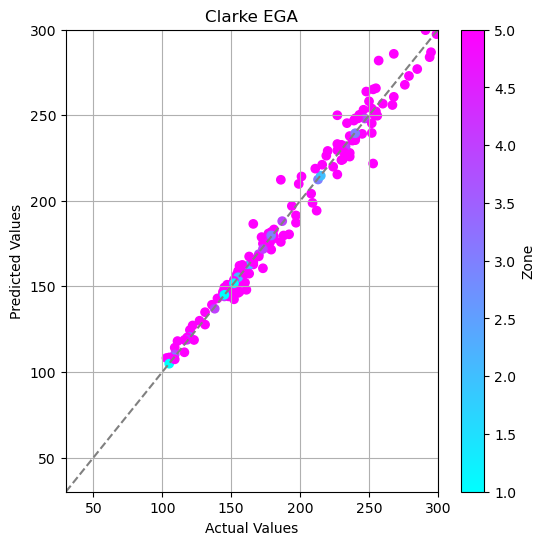

In [78]:
import matplotlib.pyplot as plt

# 生成示例数据，实际观测值和预测值
actual_values = true_value[:,-1]
predicted_values = pred_value[:,-1]

# 计算Clarke EGA图中的区域
def clarke_ega_region(actual, predicted):
    abs_diff = np.abs(predicted - actual)
    zones = np.zeros_like(abs_diff, dtype=int)
    zones[(abs_diff <= 0.2)] = 1
    zones[(abs_diff <= 0.4) & (abs_diff >0.2)] = 2
    zones[(abs_diff <= 0.8) & (abs_diff > 0.4)] = 3
    zones[(abs_diff <= 1.2) & (abs_diff > 0.8)] = 4
    zones[(abs_diff > 1.2)] = 5
    return zones

zones = clarke_ega_region(actual_values, predicted_values)

# 绘制Clarke EGA图
plt.figure(figsize=(6, 6))
plt.scatter(actual_values, predicted_values, c=zones, cmap='cool', marker='o')
plt.plot([30,300], [30,300], color='gray', linestyle='--')
plt.xlim(30,300)
plt.ylim(30,300)
plt.title("Clarke EGA")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.grid()
plt.colorbar(label="Zone")

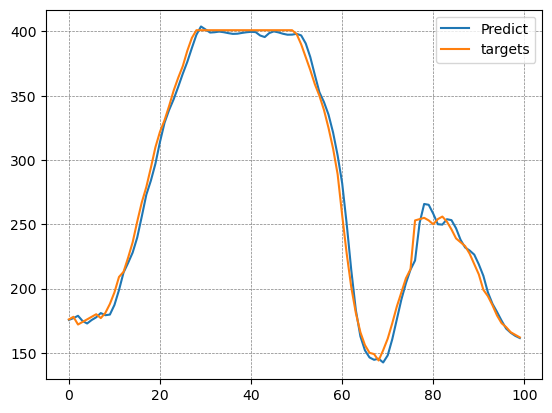

In [79]:
# 绘制predict 和 targets 的对比图
import matplotlib.pyplot as plt

plt.plot(predicted_values[:100], label="Predict")    # 预测值
plt.plot(actual_values[:100], label="targets")    # 真实值
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [80]:
# 想使用训练集的最后一个窗口预测训练集的下一个数据，再将窗口第一个数据弹出，将预测值插入窗口末尾组成一个新窗口。但是模型的输出是单个血糖值
# 缺了一些时间特征。要想实现真正的预测（有误差积累的预测）必须改变模型，使模型输出一个样本。
result = []
x = testX[2, 0, :, :].unsqueeze(0).to(device)
print(x.shape)
for i in range(50):
    
    y = model(x)

    x = torch.cat((x[:,1:,:], y.unsqueeze(1)), dim=1)
    
    result.append(y.cpu().detach().numpy())

torch.Size([1, 24, 7])


(50, 7)


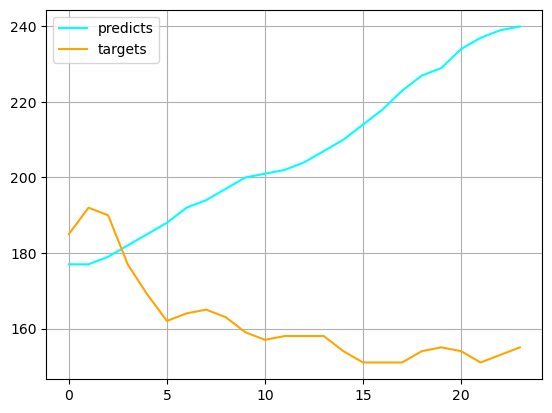

In [81]:
result = np.array(result).reshape(-1,7)
print(result.shape)
pred_values = scaler.inverse_transform(result)[:,-1].round()

true_values = testY[2,:50,:].numpy()
true_values = scaler.inverse_transform(true_values)[:,-1].round()

plt.plot(pred_values[:24],color='cyan',label='predicts')
plt.plot(true_values[:24],color='orange', label='targets')
plt.legend()
plt.grid()
plt.show()